# Analyse de données de chronographe

## Résumé pratique

Supposons que nous avons un échantillon de $n$ valeurs, notées $x_1,\ldots,x_n$. La moyenne empirique est
$$
\hat{\mu} = \frac{1}{n} \sum_{i = 1}^n x_i,
$$
et l'écart-type empirique est
$$
\hat{\sigma} = \sqrt{\frac{1}{n-1} \sum_{i = 1}^n (x_i - \hat{\mu})^2}.
$$

## Explications mathématiques

In [1]:
using Distributions
using Plots

## La distribution normale

Nous supposerons à fins d'illustrations que la vitesse initiale suit une distribution normale de moyenne 850$m/s$ et d'écart-type 3,5$m/s$, ce qui en Julia peut s'écrire comme

In [2]:
vitesse = Normal(850,3.5)

Normal{Float64}(μ=850.0, σ=3.5)

In [3]:
pdfvitesse(x) = pdf(vitesse, x)

pdfvitesse (generic function with 1 method)

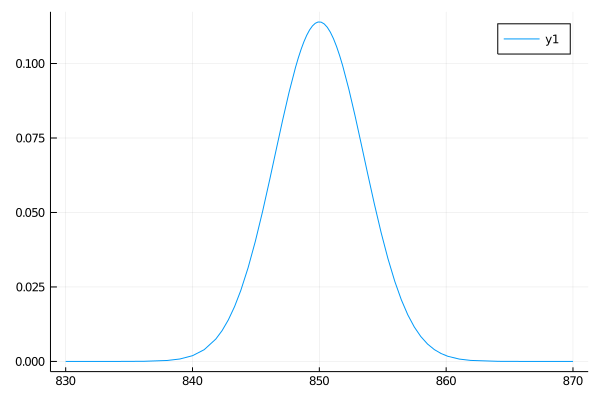

In [4]:
plot(pdfvitesse, 830, 870)

Le graphe correspond à la célèbre courbe en cloche célébrée en probabilité.

## Moyenne et écart-type

Si asymptotiquement, le moyenne est normalement distribuée en vertu du théorème de la limite centrale, les points mesurés peuvent venir d'une autre distribution. Utiliser l'écart-type pour déterminé la proportion de points autour d'une valeur donnée requiert donc l'hypothèse que ceux-ci proviennent d'une loi normale.

Supposons que c'est le cas et simulons des mesures de vitesse avec la distribution préalablement créée. Nous allons générer 10000 mesures, ce qui est bien sûr irréaliste mais permettra de discuter du calcul de l'écart-type.

In [5]:
mesures = rand(vitesse, 10000)

10000-element Array{Float64,1}:
 848.4600249454206
 850.1641776125367
 854.0994938910765
 849.9718210118162
 852.1392613106099
 847.8246896697987
 851.0706677064984
 849.7213552580325
 859.1337754352131
 854.735353687543
 850.3179892825535
 849.9531434170196
 849.4639411281172
   ⋮
 849.0131070532774
 845.9718382275107
 847.0191192660891
 849.6794690744524
 848.66830566434
 849.9106674777852
 850.1864720821368
 847.5875298900737
 847.1861327591942
 855.0025543441818
 851.6111178071606
 851.0702388149265

Remarquons que la moyenne et l'écart-type de l'échantillon correspondent bien approximativement, mais pas parfaitement, à nos hypothèses de départ:

In [6]:
μ = mean(mesures)
σ = std(mesures)
μ, σ 

(849.9909647011511, 3.4908880930723125)

Regardons à présent l'évolution des moyennes et écart-type empirique en partant de 3 observations jusqu'à 10000. L'analyse est bien entendu idéalisée puisqu'on suppose les mesures parfaites, ce qui ne sera jamais le cas en pratique.

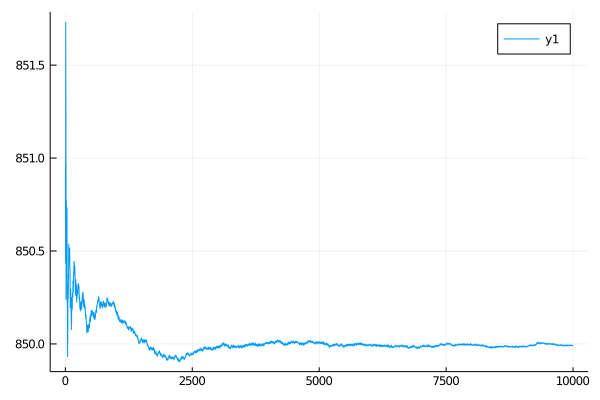

In [7]:
moyennes = [ mean(mesures[1:i]) for i = 3:10000 ]
ecarttypes = [ std(mesures[1:i]) for i = 3:10000 ]

plot(moyennes)

Nous constatons que nous avons rapidement une bonne estimation de la vitesse moyenne. Il en est tout autre pour l'écart-type.

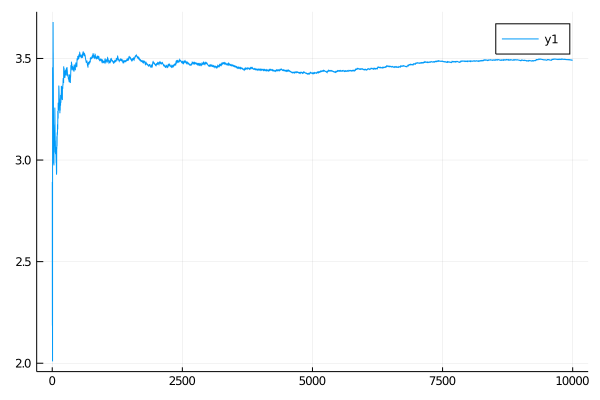

In [8]:
plot(ecarttypes)

Si nous nous intéressons seulement aux 50 premières observations, nos avons le graphe suivant.

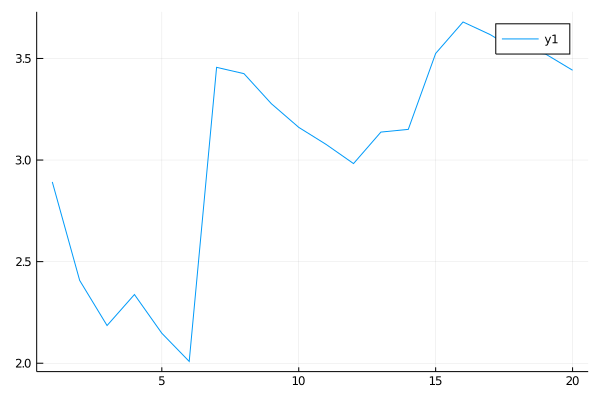

In [9]:
plot(ecarttypes[1:20])

Nous voyons que l'estimateur d'écart-type converge lentement vers la vraie valeur, et il convient de ne pas prendre les valeurs estimées comme précises (alors que l'expérience est idéalisée!). Remarquons que l'application de la formule initiale sur trois observations donne bien la valeur obtenue avec la fonction std:

In [10]:
x=(mesures[1]+mesures[2]+mesures[3])/3
y=(mesures[1]^2+mesures[2]^2+mesures[3]^2)/3
sqrt((y-x^2)*3/2)

2.89235948991868

De plus, si nous prenons 20 autres observations, le comportement est tout autre:

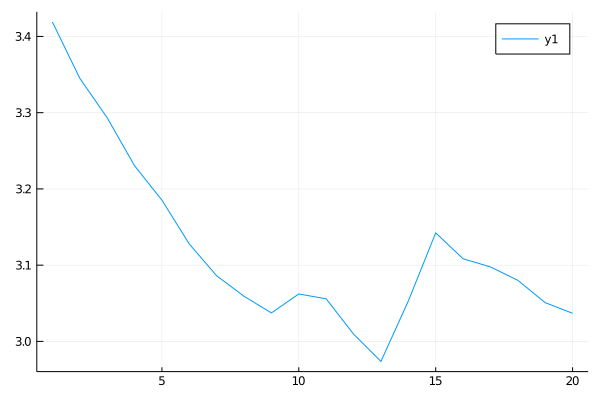

In [12]:
plot(ecarttypes[21:40])

## Conclusion

L'estimation statistique est un art en soi, et la qualité des estimateurs dépend de la quantité que nous cherchons à mesurer. L'estimation d'écart-type demeure délicate, et les valeurs doivent être considérées avec l'imprécision qui les entoure.